<a href="https://colab.research.google.com/github/IgorMoraes07/Treinos_Python/blob/main/Computer_Vision_Passo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-10-29 11:21:17--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/refs/heads/master/cfg/yolov3.cfg [following]
--2024-10-29 11:21:17--  https://github.com/pjreddie/darknet/raw/refs/heads/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/refs/heads/master/cfg/yolov3.cfg [following]
--2024-10-29 11:21:17--  https://raw.githubusercontent.com/pjreddie/darknet/refs/heads/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTT

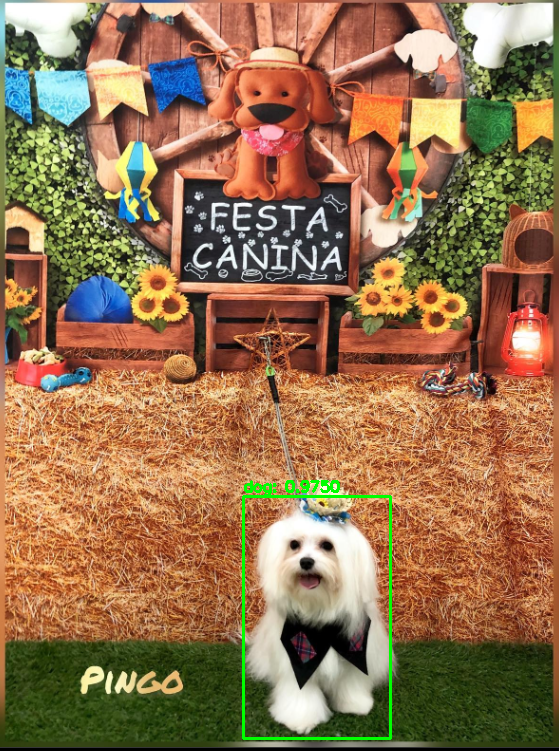

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = "/content/PingoCaipira.PNG"

# Função para carregar e detectar objetos usando YOLOv3
def detect_animal_in_image(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)
    if image is None:
        print("Erro ao carregar a imagem.")
        return

    # Dimensões da imagem
    (H, W) = image.shape[:2]

    # Baixe os arquivos de configuração e pesos do YOLOv3
    !wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg
    !wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights
    !wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -O coco.names

    # Carregar as labels (nomes dos objetos detectáveis pelo YOLOv3)
    with open("coco.names", "r") as f:
        labels = [line.strip() for line in f]

    # Carregar a rede YOLO
    net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")
    layer_names = net.getLayerNames()
    # Modification: Accessing output layers correctly for OpenCV versions >= 4.5.3
    layer_names = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    # Preparar a imagem para a detecção
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    detections = net.forward(layer_names)

    # Lista para armazenar as detecções
    boxes, confidences, class_ids = [], [], []

    # Processar as detecções
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            # Filtrar apenas os objetos com alta confiança (ajuste o threshold conforme necessário)
            if confidence > 0.5 and labels[class_id] in ["dog", "cat", "bird"]:
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Suprimir caixas sobrepostas
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

    # Desenhar caixas delimitadoras e labels na imagem
    if len(idxs) > 0:
        for i in idxs.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            color = (0, 255, 0)  # Verde para a caixa
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(labels[class_ids[i]], confidences[i])
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    cv2_imshow(image)

detect_animal_in_image(image_path)